In [16]:
import cv2
import dlib
import numpy as np
import csv
import matplotlib.pyplot as plt

In [44]:
class Preprocessing():
    #--------лицо ли это?---------
    def isface(self, points):
        if (points[0,0] < points[1, 0]) and (points[2,1] > points[1, 1]) and (points[2,1]> points[0,1]):
            return True
        else:
            return False
    #----выделение точек лице------
    def points_for_affin(self, points):
        _pfa, l, r, m = [], [], [], []
        l = []
        r = []
        m = []
        #n.extend(points[30:36])
        l.extend(points[36:42])
        r.extend(points[42:48])
        m.extend(points[48:61])
        #_pfa.append(avarage(n))
        _pfa.append(self.avarage(l))
        _pfa.append(self.avarage(r))
        _pfa.append(self.avarage(m))
        #print(_pfa)
        return _pfa
    #-----чтение точек из файла------
    def readpointsfromcsv(self):
        points = []
        with open("points.csv", 'r') as f:
            reader = csv.reader(f)
            for row in reader:
                point = []
                point.append(int(row[0]))
                point.append(int(row[1]))
                points.append(point)
        return points
    #------------афинное преобразование----------
    def rotateImage(self, image, angle):
        row,col = image.shape
        center=tuple(np.array([row,col])/2)
        rot_mat = cv2.getRotationMatrix2D(center,angle,1.0)
        new_image = cv2.warpAffine(image, rot_mat, (col,row))
        return new_image
    #------------------поворот лица-------------
    def turn_face(self, face, points):
        l = []
        r = []
        l.extend(points[36:42])
        r.extend(points[42:48])
        Lh = (avarage(l)[1] - avarage(r)[1])
        Lc = (avarage(l)[0] - avarage(r)[0])
        phi = math.atan(Lh/Lc)
        #print(phi*180/math.pi)
        turnface = self.rotateImage(face, phi*180/math.pi)
        return turnface
    
    #--------среднее значение координат--------------
    def avarage(self, mass):
        av = []
        tmpx = 0
        tmpy = 0
        for i in mass:
            tmpx += i[0]
            tmpy += i[1]
        av.append(tmpx/len(mass))
        av.append(tmpy/len(mass))
        return av
    #-----------трансформация--------------------
    def transform(self, face, Afin_points, face_pose_predictor):
        points=[[p.x, p.y] for p in face_pose_predictor(face, dlib.rectangle(0, 0, 300, 300)).parts()]
        pts1 = np.float32(self.points_for_affin(points))
        pts2 = np.float32(Afin_points)
        if(self.isface(pts1)):
            M = cv2.getAffineTransform(pts1,pts2)
            dst = cv2.warpAffine(face,M,(300,300))
            return dst
        else:
            None
          
    def affin_tr(self, face):
        afinpoints = self.readpointsfromcsv()
        predictor_model = "shape_predictor_68_face_landmarks.dat"
        face_pose_predictor = dlib.shape_predictor(predictor_model)
        return self.transform(face, afinpoints, face_pose_predictor)
      
    

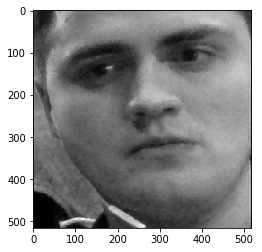

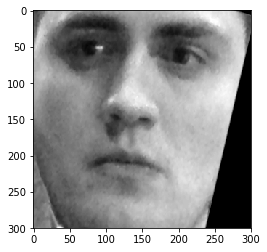

In [49]:
face = cv2.imread('123.png', 0)
plt.figure()
plt.imshow(face, cmap = 'gray')
face = cv2.resize(face, (300, 300))
prep = Preprocessing()
tr_face = prep.affin_tr(face)
plt.figure()
plt.imshow(tr_face, cmap = 'gray')